In [27]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from bs4 import BeautifulSoup
import requests

import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

In [59]:
fulldf=pd.read_csv('cleanedFulldf.csv', index_col=0)
fulldf['dateutc'] = fulldf['dateutc'].astype('datetime64')
fulldf = fulldf.drop('dateutcindateform', 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(fulldf, fulldf.lowest_price, test_size=0.4, random_state=0)

In [61]:
fulldf

,listing_count,avg_price,lowest_price_good,lowest_price,highest_price,city,venuename,venuescore,ticket_score,id,home_team,away_team,hometeamscore,awayteamscore,dateutc,daysaway,dateloaded,City,cntStars_home,WPCT_home,STRK_home,rankNBA_home,cntStars_away,WPCT_away,STRK_away,rankNBA_away,HomeAVG,HomePCT,AwayAVG,AwayPCT,TotalAVG,TotalPCT,Population,numTeams,holiday,weekday
1,815,62.0,20,20,1800,Miami,American Airlines Arena,0.85776,0.78884,2759732,Miami Heat,Boston Celtics,0.78556,0.74908,2015-12-01,2,2015-11-29,Miami,2,0.667,1,5,0,0.563,2,12,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Tuesday
4,3431,146.0,49,49,6505,Miami,American Airlines Arena,0.85776,0.84152,2759651,Miami Heat,Brooklyn Nets,0.78556,0.75524,2015-12-29,30,2015-11-29,Miami,2,0.667,1,5,3,0.188,-2,28,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Tuesday
5,4093,76.0,18,18,4435,Miami,American Airlines Arena,0.85776,0.82779,2759635,Miami Heat,Brooklyn Nets,0.78556,0.75524,2016-03-28,120,2015-11-29,Miami,2,0.667,1,5,3,0.188,-2,28,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Monday
7,3886,125.0,36,36,5914,Miami,American Airlines Arena,0.85776,0.84336,2759767,Miami Heat,New York Knicks,0.78556,0.81215,2016-01-07,39,2015-11-29,Miami,2,0.667,1,5,1,0.471,-3,19,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Thursday
9,4046,78.0,20,20,4140,Miami,American Airlines Arena,0.85776,0.83536,2759683,Miami Heat,Philadelphia 76ers,0.78556,0.70023,2016-03-06,98,2015-11-29,Miami,2,0.667,1,5,0,0.000,-17,30,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Sunday
11,3483,100.0,32,32,4731,Miami,American Airlines Arena,0.85776,0.82222,2759671,Miami Heat,Toronto Raptors,0.78556,0.68539,2015-12-19,20,2015-11-29,Miami,2,0.667,1,5,1,0.647,4,7,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Saturday
14,3838,141.0,33,33,5914,Miami,American Airlines Arena,0.85776,0.84987,2759649,Miami Heat,Chicago Bulls,0.78556,0.76158,2016-03-02,94,2015-11-29,Miami,2,0.667,1,5,2,0.643,-1,8,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Wednesday
15,4050,142.0,39,39,7688,Miami,American Airlines Arena,0.85776,0.84890,2759652,Miami Heat,Chicago Bulls,0.78556,0.76158,2016-04-08,131,2015-11-29,Miami,2,0.667,1,5,2,0.643,-1,8,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Friday
18,3049,217.5,79,79,8870,Miami,American Airlines Arena,0.85776,0.87277,2759681,Miami Heat,Cleveland Cavaliers,0.78556,0.64462,2015-12-06,7,2015-11-29,Miami,2,0.667,1,5,2,0.765,2,3,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Sunday
19,4098,271.0,100,100,10053,Miami,American Airlines Arena,0.85776,0.87339,2759656,Miami Heat,Cleveland Cavaliers,0.78556,0.64462,2016-03-19,111,2015-11-29,Miami,2,0.667,1,5,2,0.765,2,3,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Saturday


TypeError: cannot concatenate 'str' and 'float' objects

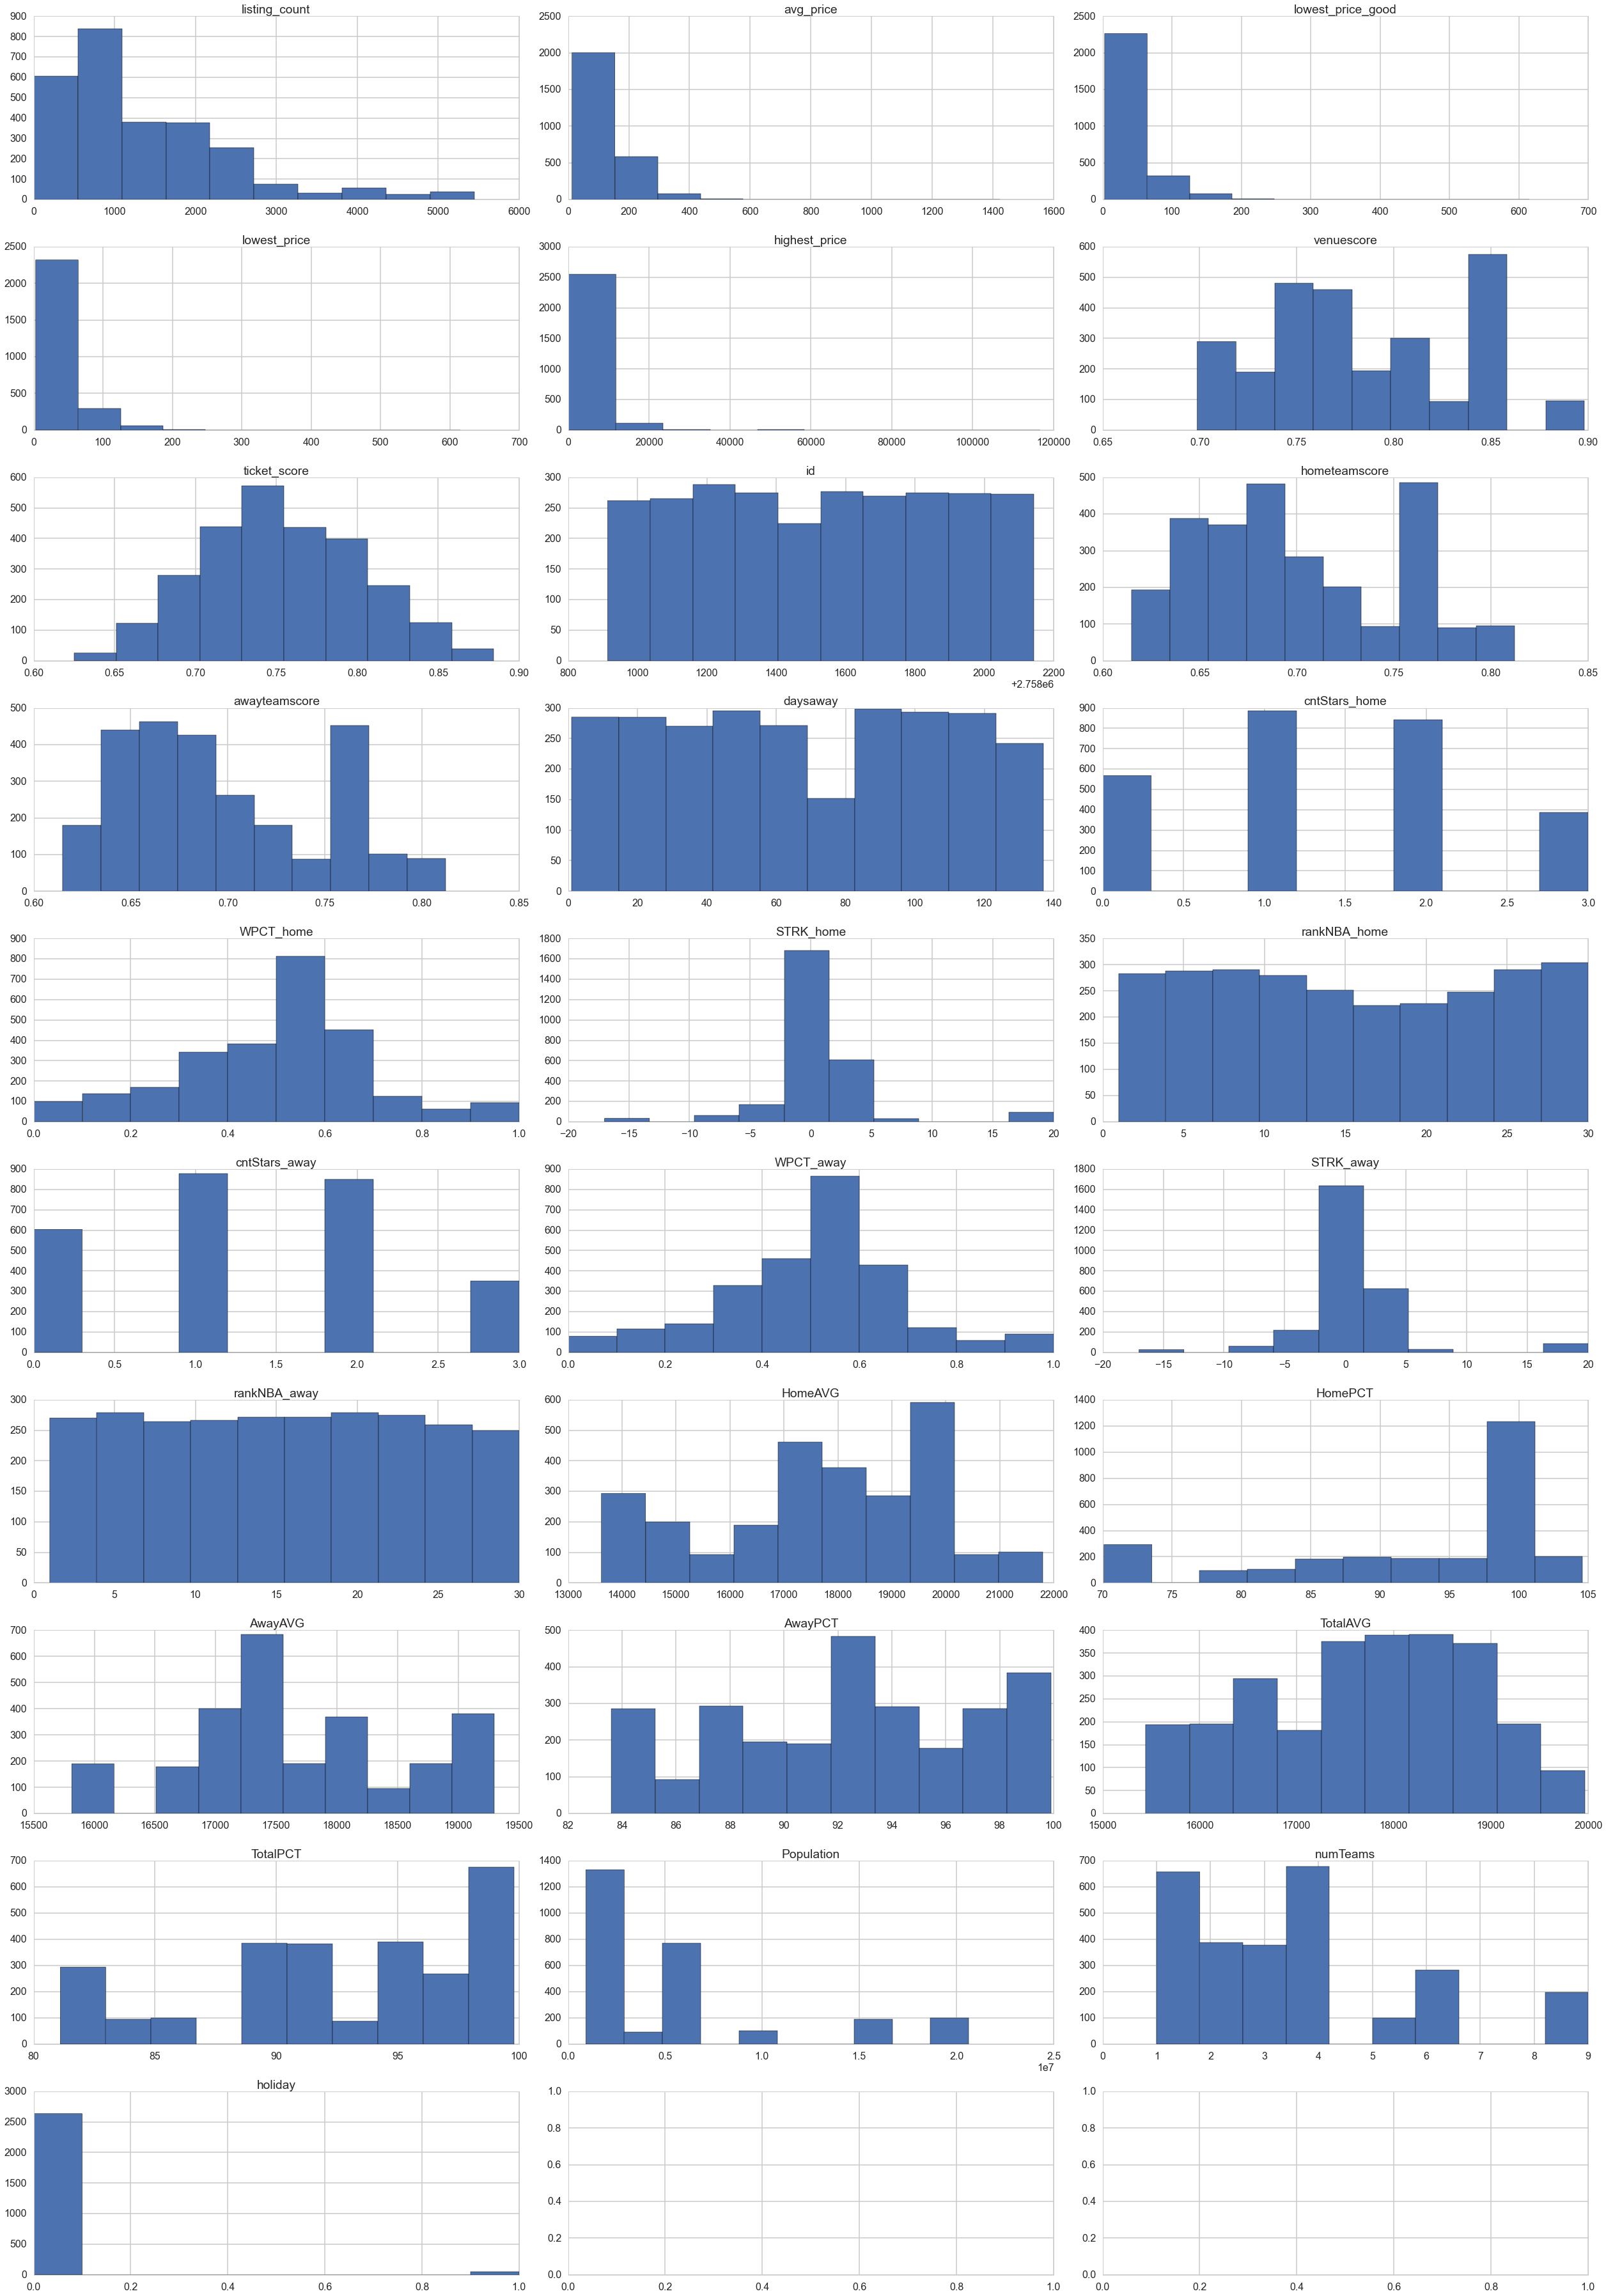

In [63]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)
listCol=list(fulldf.columns)
#for weekday histogram, dict((x, data.count(x)) for x in data)
listCol.remove('city')
listCol.remove('venuename')
listCol.remove('home_team')
listCol.remove('away_team')
listCol.remove('dateutc')
listCol.remove('City')
listCol.remove('dateloaded')

# print listCol
for ax, col in zip(axes.ravel(), listCol):
    fulldf[col].hist(ax=ax)
    ax.set_title(col)

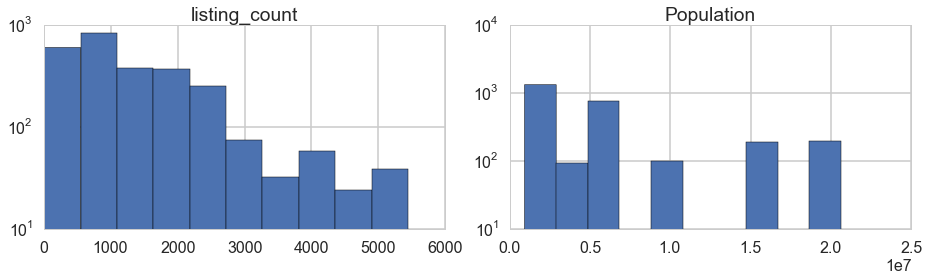

In [64]:
listlogCol=['listing_count','Population']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4), tight_layout=True)
for ax, col in zip(axes.ravel(), listlogCol):
    fulldf[col].hist(ax=ax,log=True)
    ax.set_title(col)

In [65]:
fulldf['logListCount']=np.log(fulldf['listing_count'])
fulldf['logPopulation']=np.log(fulldf['Population'])

In [52]:
# fulldfComp
logListCount=fulldf['logListCount']
model1='lowest_price ~ logListCount+daysaway + venuescore +ticket_score+ numTeams+logPopulation+WPCT_home+WPCT_away+avgAudi+cntStars_home+cntStars_away+STRK_home+STRK_away'
ols_model = ols(model1, fulldf).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 06 Dec 2015   Prob (F-statistic):          1.60e-212
Time:                        18:53:11   Log-Likelihood:                -12961.
No. Observations:                2683   AIC:                         2.595e+04
Df Residuals:                    2670   BIC:                         2.602e+04
Df Model:                          12                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -39.5840     20.863     -1.897      0.058       -80.493     1.325
daysaway         -0.0314      0.015     -2.109      0.035        -0.061    -0.002
venuescore     -227.4642     29.408     -7.735      0.000      -285.129  -169.799
ticket_score    265.5230     24.811     10.702      0.000       216.873   314.173
numTeams          5.6488      0.663      8.520      0.000         4.349     6.949
logPopulation    -1.8206      1.670     -1.090      0.276        -5.096     1.454
WPCT_home        -8.3759      4.643     -1.804      0.071       -17.480     0.728
WPCT_away         0.8677      4.297      0.202      0.840        -7.558     9.294
avgAudi           0.0038      0.000      9.801      0.000         0.003     0.005
cntStars_home    -4.4544      0.720     -6.189      0.000        -5.866    -3.043
cntStars_away     3.0425      0.669      4.546      0.000         1.730     4.355
STRK_home         2.6804      0.180     14.916      0.000         2.328     3.033
STRK_away         1.2278      0.176      6.959      0.000         0.882     1.574
==============================================================================
Omnibus:                     3663.696   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1572031.158
Skew:                           7.482   Prob(JB):                         0.00
Kurtosis:                     120.636   Cond. No.                     1.07e+06
==============================================================================

Warnings:
[1] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
fulldf[fulldf['id']==2759951]

,listing_count,avg_price,lowest_price_good,lowest_price,highest_price,city,venuename,venuescore,ticket_score,id,home_team,away_team,hometeamscore,awayteamscore,dateutc,daysaway,dateloaded,City,cntStars_home,WPCT_home,STRK_home,rankNBA_home,cntStars_away,WPCT_away,STRK_away,rankNBA_away,HomeAVG,HomePCT,AwayAVG,AwayPCT,TotalAVG,TotalPCT,Population,numTeams,holiday,weekday,logListCount,logPopulation
4089,521,130,24,24,808,Portland,Moda Center,0.75729,0.75676,2759951,Portland Trail Blazers,New York Knicks,0.68068,0.81215,2015-12-13,14,2015-11-29,Portland,1,0.412,1,22,1,0.471,-3,19,19285,92.7,16975,90,18062,91.4,1976000,1,0,Sunday,6.255750,14.496585
4153,543,123,31,31,808,Portland,Moda Center,0.75724,0.75637,2759951,Portland Trail Blazers,New York Knicks,0.68054,0.81203,2015-12-13,10,2015-12-03,Portland,1,0.368,-2,23,1,0.474,1,18,19285,92.7,16975,90,18062,91.4,1976000,1,0,Sunday,6.297109,14.496585
4217,522,115,28,28,808,Portland,Moda Center,0.75717,0.75592,2759951,Portland Trail Blazers,New York Knicks,0.68039,0.81207,2015-12-13,9,2015-12-04,Portland,1,0.400,1,23,1,0.500,2,17,19285,92.7,16975,90,18062,91.4,1976000,1,0,Sunday,6.257668,14.496585


In [73]:
listVar=['listing_count','daysaway','numTeams','Population','rankNBA_home','rankNBA_away','WPCT_home','WPCT_away','cntStars_home','cntStars_away','STRK_home','STRK_away','HomePCT','AwayPCT']
listInteract=[]
for num in range(len(listVar)):
    for num1 in range(num,len(listVar)):
        listInteract.append(listVar[num]+':'+listVar[num1])
listInteract=listVar+listInteract
modelInter='+'.join(listInteract)
modelInter='lowest_price ~'+modelInter

In [71]:
ols_model = ols(modelInter,fulldf).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     62.28
Date:                Sun, 06 Dec 2015   Prob (F-statistic):               0.00
Time:                        19:36:36   Log-Likelihood:                -11536.
No. Observations:                2683   AIC:                         2.334e+04
Df Residuals:                    2549   BIC:                         2.413e+04
Df Model:                         133                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                    1.968e+04   5279.000      3.729      0.000      9332.780     3e+04
listing_count                  -0.2093      0.115     -1.815      0.070        -0.435     0.017
venuescore                  -3782.0136   3281.296     -1.153      0.249     -1.02e+04  2652.263
ticket_score                -8547.2232   1309.949     -6.525      0.000     -1.11e+04 -5978.551
hometeamscore               -1819.9514   2486.781     -0.732      0.464     -6696.269  3056.366
awayteamscore                4118.1795    541.905      7.599      0.000      3055.561  5180.798
daysaway                        0.3626      0.505      0.718      0.473        -0.627     1.352
numTeams                    -2004.1919    455.924     -4.396      0.000     -2898.212 -1110.172
Population                      0.0011      0.000      3.694      0.000         0.001     0.002
rankNBA_home                  -35.3560     22.664     -1.560      0.119       -79.799     9.087
rankNBA_away                   27.3513      7.769      3.521      0.000        12.117    42.585
WPCT_home                    1644.8777   1617.636      1.017      0.309     -1527.138  4816.893
WPCT_away                    2299.8480    398.887      5.766      0.000      1517.672  3082.025
cntStars_home                 390.0443    325.715      1.198      0.231      -248.649  1028.738
cntStars_away                  29.7721     24.515      1.214      0.225       -18.299    77.844
STRK_home                     -15.4128     16.904     -0.912      0.362       -48.560    17.734
STRK_away                     -38.9562      6.496     -5.997      0.000       -51.694   -26.218
HomePCT                      -162.4042     34.947     -4.647      0.000      -230.931   -93.877
AwayPCT                      -187.2042     72.910     -2.568      0.010      -330.173   -44.235
listing_count:venuescore        0.5310      0.199      2.671      0.008         0.141     0.921
listing_count:ticket_score     -0.3705      0.045     -8.310      0.000        -0.458    -0.283
listing_count:hometeamscore    -0.2594      0.167     -1.557      0.120        -0.586     0.067
listing_count:awayteamscore     0.1027      0.016      6.482      0.000         0.072     0.134
listing_count:daysaway      -9.903e-05   1.87e-05     -5.302      0.000        -0.000 -6.24e-05
listing_count:numTeams          0.0227      0.004      5.998      0.000         0.015     0.030
listing_count:Population    -7.348e-09   1.19e-09     -6.162      0.000     -9.69e-09 -5.01e-09
listing_count:rankNBA_home      0.0028      0.001      3.742      0.000         0.001     0.004
listing_count:rankNBA_away      0.0003      0.000      1.198      0.231        -0.000     0.001
listing_count:WPCT_home         0.3033      0.033      9.165      0.000         0.238     0.368
listing_count:WPCT_away         0.0353      0.015      2.377      0.018         0.006     

In [15]:
removeCandi=list(ols_model.pvalues[ols_model.pvalues.values>0.05].index)
removeVar=[]
for elem in removeCandi:
     if ':' in elem:
        removeVar.append(elem)
listInteract1=listInteract
for elem in removeVar:
    listInteract1.remove(elem)
modelInter1='+'.join(listInteract1)
modelInter1='lowest_price ~'+modelInter1
ols_model = ols(modelInter1, trainDf,weights=logListCount).fit()
ols_model.summary()        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 5.265e+04
Date:                Sun, 06 Dec 2015   Prob (F-statistic):               0.00
Time:                        16:04:28   Log-Likelihood:            -1.1467e+06
No. Observations:              256236   AIC:                         2.293e+06
Df Residuals:                  256164   BIC:                         2.294e+06
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                     114.2426     31.067      3.677      0.000        53.352   175.134
venuescore                    726.0621     45.639     15.909      0.000       636.612   815.513
ticket_score                -2370.8921     49.301    -48.090      0.000     -2467.521 -2274.263
daysaway                        0.7100      0.026     27.476      0.000         0.659     0.761
numTeams                       16.0513      2.261      7.098      0.000        11.619    20.484
Population                      0.0001   1.74e-06     66.272      0.000         0.000     0.000
WPCT_home                   -1828.8631     35.526    -51.479      0.000     -1898.494 -1759.233
WPCT_away                       3.8242      7.837      0.488      0.626       -11.536    19.184
avgAudi                         0.0844      0.002     46.302      0.000         0.081     0.088
cntStars_home                 -63.9359      2.470    -25.882      0.000       -68.778   -59.094
cntStars_away                   1.0807      1.258      0.859      0.390        -1.385     3.546
STRK_home                      10.5637      0.773     13.662      0.000         9.048    12.079
STRK_away                       3.0793      0.316      9.750      0.000         2.460     3.698
venuescore:ticket_score      2960.0110     69.720     42.456      0.000      2823.362  3096.660
venuescore:daysaway             0.4032      0.049      8.219      0.000         0.307     0.499
venuescore:numTeams          -103.9539      2.985    -34.825      0.000      -109.805   -98.103
venuescore:Population          -0.0002   2.71e-06    -78.944      0.000        -0.000    -0.000
venuescore:WPCT_home          722.9928     48.663     14.857      0.000       627.614   818.371
venuescore:WPCT_away         -276.4315     14.820    -18.653      0.000      -305.478  -247.385
venuescore:avgAudi             -0.1480      0.003    -56.104      0.000        -0.153    -0.143
venuescore:cntStars_home      174.6940      4.686     37.281      0.000       165.510   183.878
venuescore:cntStars_away      -25.2981      2.337    -10.826      0.000       -29.878   -20.718
venuescore:STRK_home           -5.1513      1.118     -4.608      0.000        -7.343    -2.960
venuescore:STRK_away            9.5588      0.622     15.359      0.000         8.339    10.779
ticket_score:daysaway          -1.4496      0.043    -33.792      0.000        -1.534    -1.366
ticket_score:numTeams          24.1541      1.865     12.950      0.000        20.498    27.810
ticket_score:WPCT_home        623.0467     15.844     39.323      0.000       591.992   654.101
ticket_score:WPCT_away        180.2835     12.864     14.014      0.000       155.070   205.497
ticket_score:cntStars_home    -17.3364      2.582     -6.714      0.000       -22.397   -12.275
ticket_scor

In [20]:
# X=testDf
# ols_model.predict(X)
# predictions = results.predict(data[half:])
# model = OLS(labels[:half], data[:half])
# results = model.fit()
# predictions = results.predict(data[half:])
ols_model.predict(testDf)

AttributeError: 'DataFrame' object has no attribute 'design_info'